# <p align="center">Hotel Customer Segmentation</p>

---

## <p align="center">*2 - Clustering*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *March 10, 2025*  
📍 **Prepared for:** *Hotel H*  

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. ["Regular" Clustering](#2.-"Regular"-Clustering)<br>
    
    2.1 [K-Means](#2.1-K-Means) <br>
    
    2.2 [DBSCAN](#2.2-DBSCAN) <br><br>
    
3. [Clustering with Dimensionality Reduction](#3.-Clustering-with-Dimensionality-Reduction)<br>

    3.1 [Principal Components Analysis](#3.1-Principal-Components-Analysis) <br>
    
    3.2 [K-Means](#3.2-K-Means) <br>
    
    3.3 [DBSCAN](#3.3-DBSCAN) <br><br>
 

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

# Clustering Algorithms
from sklearn.cluster import DBSCAN, MeanShift, KMeans, \
    AgglomerativeClustering, estimate_bandwidth
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.neighbors import NearestNeighbors

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

# External Functions File
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [2]:
df = pd.read_csv('./treated_data.csv', index_col = 'Unnamed: 0')
df

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0       60.0              480.0             64.0           495.0   
1       54.0             1197.0             14.0           695.0   
4       53.0              755.0             56.0           165.0   
6       33.0              673.0              2.0           237.0   
7       31.0               94.0            179.0           168.0   
...      ...                ...              ...             ...   
107621  22.0              159.0             69.0           212.0   
107622  54.0              209.0             83.0           256.5   
107624  41.0              783.0             58.0           218.0   
107625  19.0               46.0             89.0           911.7   
107627  60.0               55.0            176.0           730.8   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0              162.0               0.0               0.0                2.0   
1              100.0               0.0               0.0                1.0   
4               12.0               0.0               0.0                1.0   
6               71.6               0.0               0.0                1.0   
7               66.0               0.0               0.0                1.0   
...              ...               ...               ...                ...   
107621          32.0               0.0               0.0                1.0   
107622          74.4               0.0               0.0                1.0   
107624          14.0               0.0               0.0                1.0   
107625          31.0               0.0               0.0                1.0   
107627          96.0               0.0               0.0                1.0   

        PersonsNights  RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  \
0                 6.0         3.0            0       0              1   
1                10.0         5.0            1       0              1   
4                 3.0         1.0            0       0              0   
6                 3.0         3.0            0       0              0   
7                 2.0         2.0            0       0              1   
...               ...         ...          ...     ...            ...   
107621            4.0         2.0            0       0              0   
107622            6.0         3.0            0       0              0   
107624            2.0         2.0            0       0              0   
107625           14.0         7.0            0       0              1   
107627           12.0         4.0            0       0              0   

        SRTwinBed  SRQuietRoom  TotalRevenue  RetentionRate  RevenuePerNight  \
0               0            1         657.0            1.0       219.000000   
1               0            0         795.0            1.0       159.000000   
4               0            0         177.0            1.0       177.000000   
6               0            0         308.6            1.0       102.866667   
7               0            0         234.0            1.0       117.000000   
...           ...          ...           ...            ...              ...   
107621          1            0         244.0            1.0       122.000000   
107622          1            0         330.9            1.0       110.300000   
107624          0            0         232.0            1.0       116.000000   
107625          0            0         942.7            1.0       134.671429   
107627          0            0         826.8            1.0       206.700000   

        RevenuePerPersonNight  NumberOfSR  Foreigner  \
0                  109.500000           1          1   
1                   79.500000           2          1   
4                   59.000000           0          1   
6                  102.866667           0          1   
7                  117.000000           1          1   
...                       ...         ...        ...   
107621       

In [ ]:
outliers = pd.read_csv('./outliers.csv')
outliers

Removing Columns not relevant for clustering purposes

In [4]:
df.drop(['Age','DaysSinceCreation', 'AverageLeadTime', 'FlagOutlier'], axis = 1, inplace = True)

**Scaling**

In [5]:
scaled_data = MinMaxScaler().fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=df.columns, 
                           index=df.index)

In [6]:
scaled_data.head(3)

LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0        0.066757      0.057553               0.0               0.0   
1        0.093729      0.035527               0.0               0.0   
4        0.022252      0.004263               0.0               0.0   

   BookingsCheckedIn  PersonsNights  RoomNights  SRHighFloor  SRCrib  \
0               0.04       0.070423        0.04          0.0     0.0   
1               0.00       0.126761        0.08          1.0     0.0   
4               0.00       0.028169        0.00          0.0     0.0   

   SRKingSizeBed  SRTwinBed  SRQuietRoom  TotalRevenue  RetentionRate  \
0            1.0        0.0          1.0      0.076226            1.0   
1            1.0        0.0          0.0      0.092261            1.0   
4            0.0        0.0          0.0      0.020451            1.0   

   RevenuePerNight  RevenuePerPersonNight  NumberOfSR  Foreigner  \
0         0.105730               0.091302        0.25        1.0   
1         0.076719               0.066211        0.50        1.0   
4         0.085422               0.049066        0.00        1.0   

   LeadTimeCategory_Last-minute  LeadTimeCategory_Planner  AgeGroup_Senior  \
0                           0.0                       0.0              1.0   
1                           0.0                       1.0              1.0   
4                           0.0                       0.0              1.0   

   AgeGroup_Young  CustomerCategory_New  CustomerCategory_Recent  \
0             0.0                   0.0                      1.0   
1             0.0                   0.0                      0.0   
4             0.0                   0.0                      1.0   

   Continent_AS  Continent_EU  Continent_NA  Continent_SA  DC_Corporate  \
0           0.0           1.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
4           0.0           1.0           0.0           0.0           0.0   

   DC_Direct  DC_Travel Agent/Operator  
0        1.0                       0.0  
1        0.0                       1.0  
4        0.0                       1.0

# 2. "Regular" Clustering

<a href="#top">Top &#129033;</a>

## 2.1 K-Means

**Elbow Method**

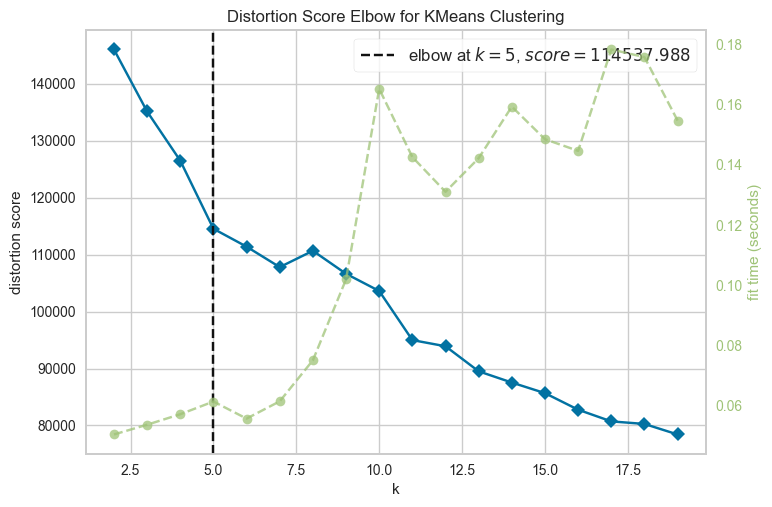

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans(random_state=32)
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(scaled_data)
visualizer1.show()

**Final Model for KM**

In [35]:
kmclust = KMeans(n_clusters = 5, random_state=32)

km_labels = kmclust.fit_predict(scaled_data)

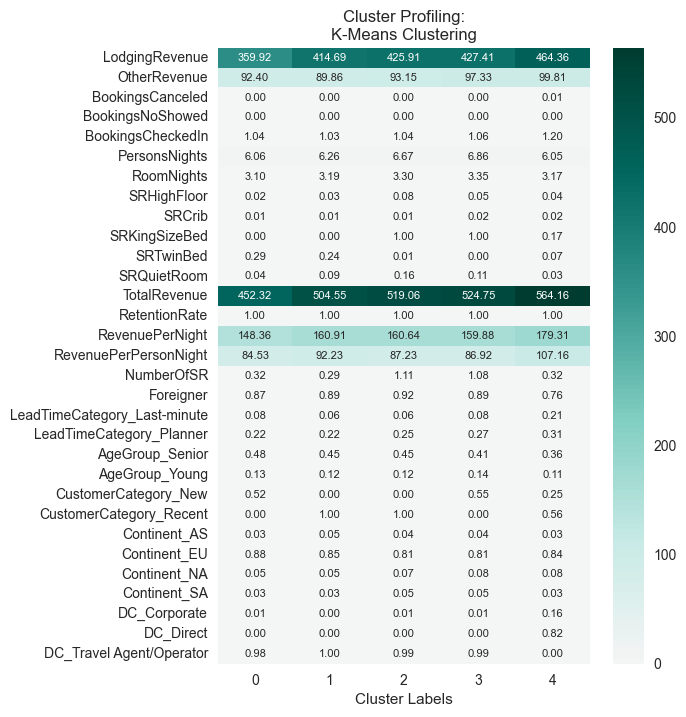

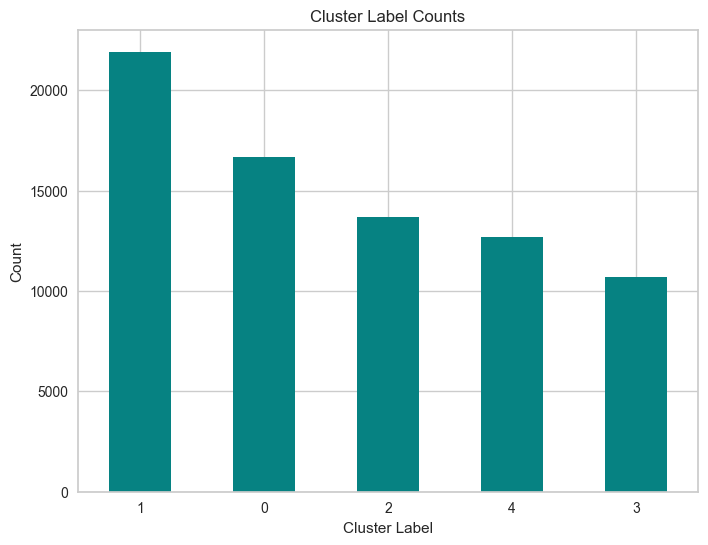

In [36]:
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

**UMAP Visualisation**

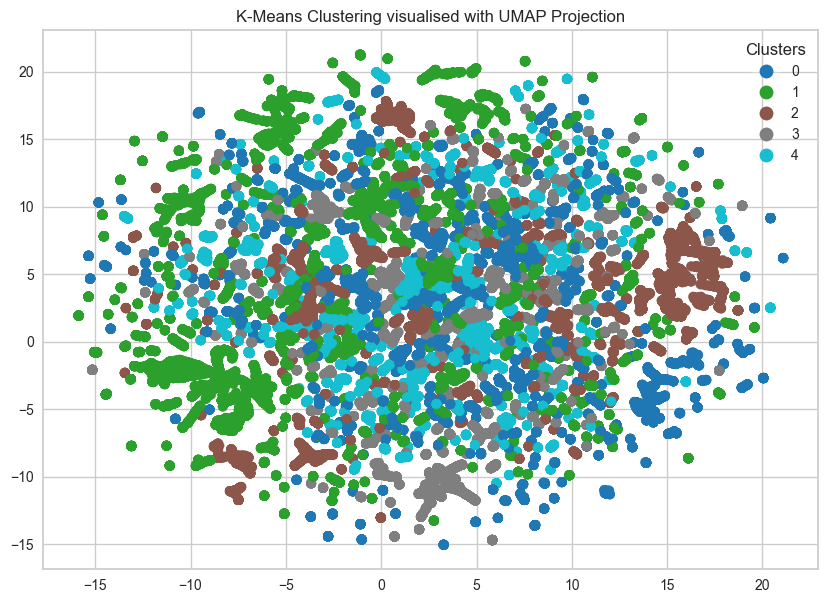

In [37]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = km_labels,
                   technique = 'K-Means Clustering visualised with UMAP')

## 2.2 DBSCAN

<a href="#top">Top &#129033;</a>

**K-distance graph**

In [38]:
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(scaled_data)
distances, _ = neigh.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])

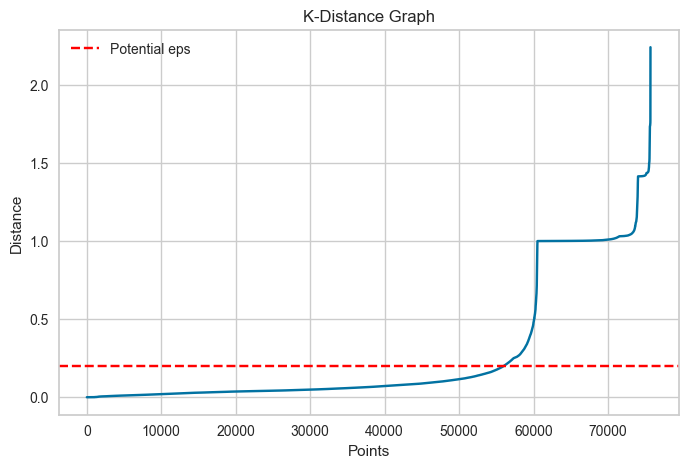

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.axhline(y=0.20, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN**

In [ ]:
# Perform DBSCAN clustering
eps_value = 1.5
dbscan = DBSCAN(eps=eps_value, min_samples=200)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [61]:
# Number of estimated clusters
n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of estimated clusters: {n_clusters}")

Number of estimated clusters: 1


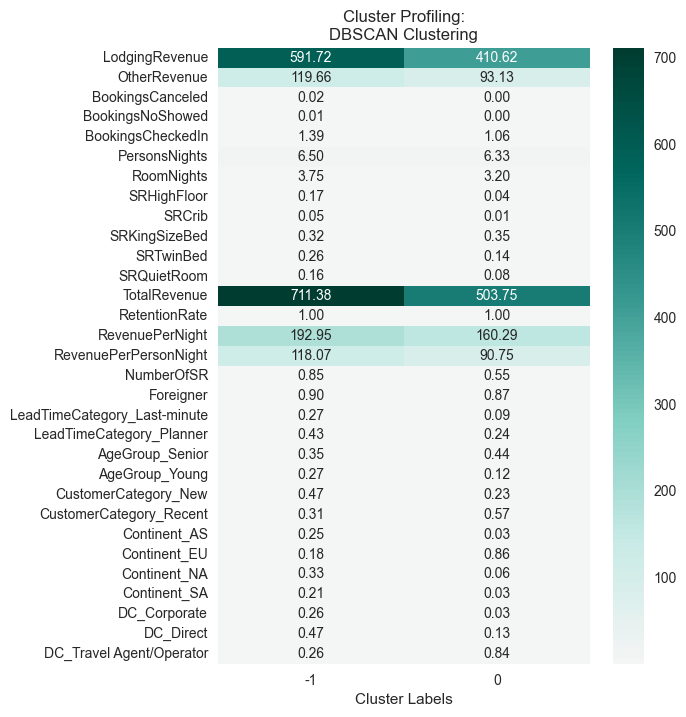

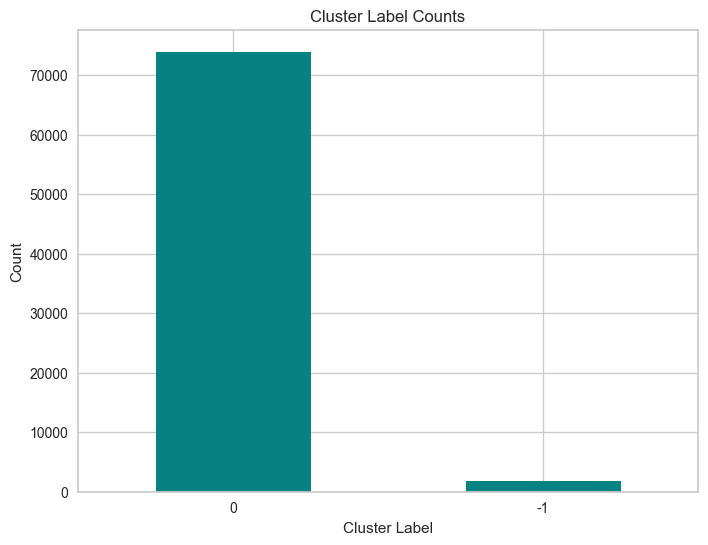

In [58]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN")
f.plot_counts(dbscan_labels)

**UMAP Visualisation**

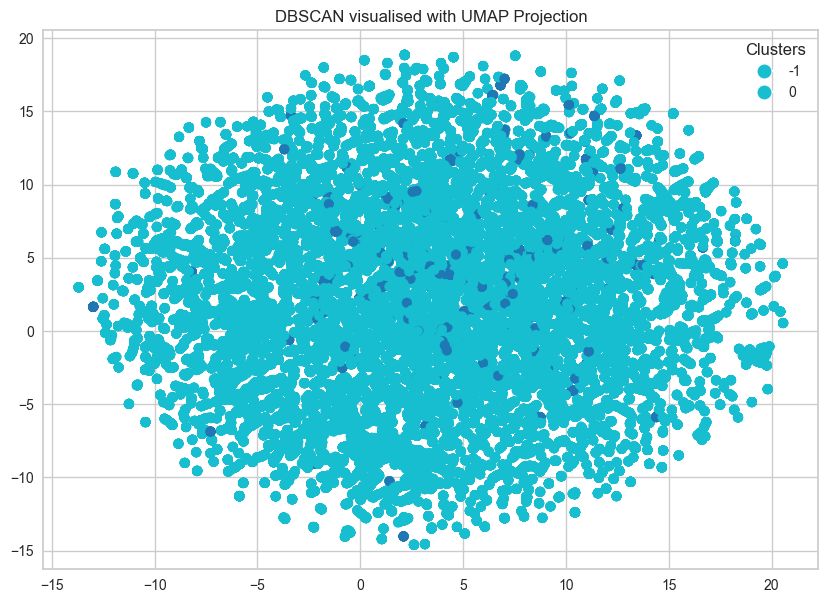

In [59]:
umap_object = umap.UMAP(n_neighbors=5)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets=dbscan_labels, technique='DBSCAN visualised with UMAP')

As DBSCAN identifies *noise* with a -1 label, bellow we can inspect how many observations were identified as such.

In [62]:
outliers = df[dbscan_labels == -1]
print(f"Number of detected outliers: {len(outliers)}")

Number of detected outliers: 11


# 3. Clustering with Dimensionality Reduction

<a href="#top">Top &#129033;</a>

## 3.1 Principal Components Analysis

**Explained Variance vs Number of Components**

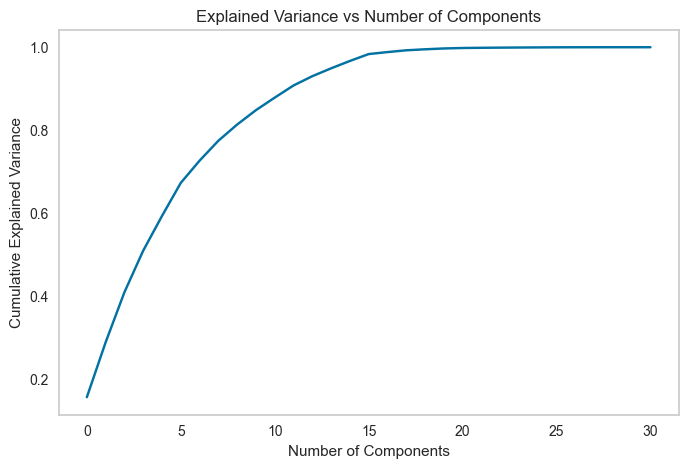

In [63]:
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.title('Explained Variance vs Number of Components')
plt.show()

In [64]:
# Create DataFrame with all PCs
pcaDF = pd.DataFrame({
    'Component': range(1, len(pca_full.explained_variance_ratio_) + 1),
    'Variance explained': pca_full.explained_variance_ratio_,
    'Cumulative variance explained': np.cumsum(pca_full.explained_variance_ratio_)
})

pcaDF

Component  Variance explained  Cumulative variance explained
0           1        1.567812e-01                       0.156781
1           2        1.322530e-01                       0.289034
2           3        1.205851e-01                       0.409619
3           4        1.002951e-01                       0.509914
4           5        8.353590e-02                       0.593450
5           6        7.966328e-02                       0.673114
6           7        5.354733e-02                       0.726661
7           8        4.800304e-02                       0.774664
8           9        3.903170e-02                       0.813696
9          10        3.467544e-02                       0.848371
10         11        3.019158e-02                       0.878563
11         12        2.926903e-02                       0.907832
12         13        2.236622e-02                       0.930198
13         14        1.894097e-02                       0.949139
14         15        1.773927e-02                       0.966878
15         16        1.661817e-02                       0.983496
16         17        4.780029e-03                       0.988276
17         18        4.322774e-03                       0.992599
18         19        2.418715e-03                       0.995018
19         20        1.995064e-03                       0.997013
20         21        1.101274e-03                       0.998114
21         22        5.198046e-04                       0.998634
22         23        3.586661e-04                       0.998993
23         24        2.895388e-04                       0.999282
24         25        2.424932e-04                       0.999525
25         26        2.357694e-04                       0.999760
26         27        1.324844e-04                       0.999893
27         28        5.147997e-05                       0.999944
28         29        3.552644e-05                       0.999980
29         30        2.001622e-05                       1.000000
30         31        4.254117e-19                       1.000000

**2 PCs**

In [69]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(scaled_data)

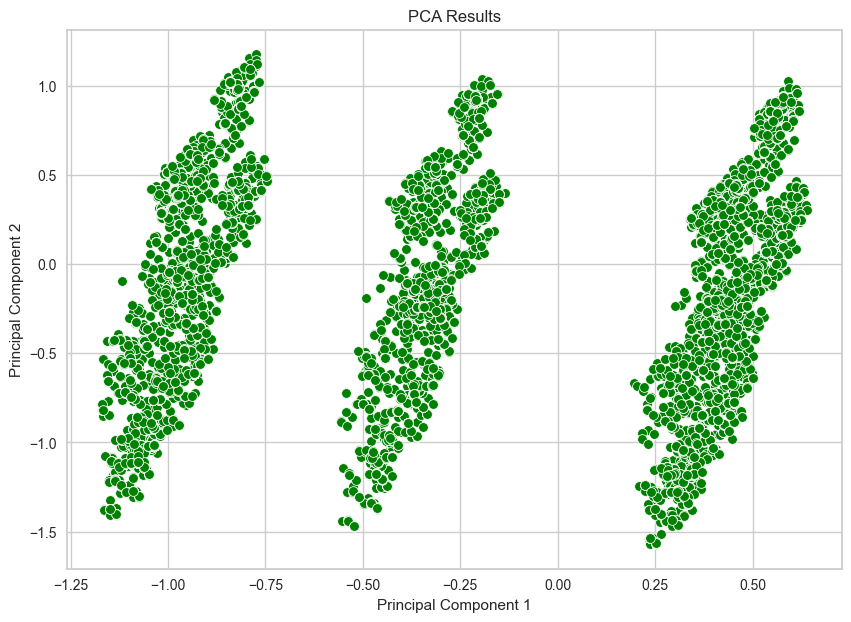

In [70]:
X_pca_df2 = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df2, color='green')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


**3 PCs**

In [71]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(scaled_data)
X_pca_df3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])

# Interactive 3D Plot
fig = px.scatter_3d(X_pca_df3, x='PC1', y='PC2', z='PC3', color=X_pca_df3.index,  
                    title='Interactive 3D PCA Plot', color_continuous_scale='Greens', opacity=0.8)

fig.update_traces(marker=dict(size=7, line=dict(width=1, color='darkgreen')))
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

fig.show()

***N* PCs**

In [130]:
pca16 = PCA(n_components=16)
X_pca16 = pca16.fit_transform(scaled_data)

**Explained Variance Ratio by Principal Component**

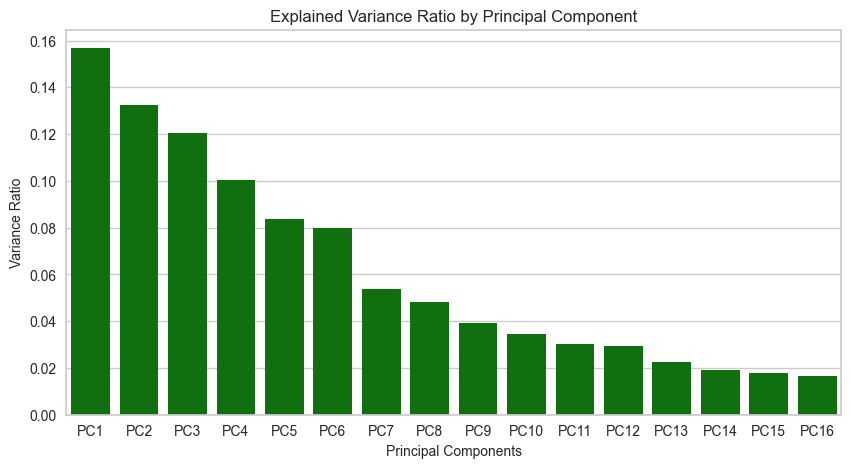

In [131]:
explained_variance = pca16.explained_variance_ratio_

plt.figure(figsize=(10, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, color='green')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()


If a column has high absolute values in a component, that feature strongly influences that component.
We can determine which features contribute most to variance in the data.

In [134]:
# Create a dataframe with the weights per component
weights_df = pd.DataFrame(pca16.components_,columns=df.columns)
weights_df.T

0         1         2         3   \
LodgingRevenue               -0.000206 -0.001305 -0.003636  0.004417   
OtherRevenue                 -0.001120  0.003310  0.005277  0.002950   
BookingsCanceled              0.000009 -0.000711 -0.000023  0.001099   
BookingsNoShowed              0.000011 -0.000315  0.000055  0.000418   
BookingsCheckedIn            -0.000237 -0.002899  0.000132  0.004157   
PersonsNights                 0.000615  0.010349 -0.001264  0.000058   
RoomNights                   -0.000063  0.005205  0.000358  0.001879   
SRHighFloor                   0.015850  0.020477 -0.032428  0.023111   
SRCrib                       -0.004948 -0.004350 -0.013964  0.006764   
SRKingSizeBed                -0.017990  0.524032 -0.498776  0.516489   
SRTwinBed                    -0.014222 -0.036472  0.194317 -0.351119   
SRQuietRoom                   0.033887  0.082894 -0.038448  0.013948   
TotalRevenue                 -0.000544 -0.000042 -0.001406  0.004771   
RetentionRate                -0.000114  0.001422 -0.000113 -0.001967   
RevenuePerNight              -0.000202 -0.006267 -0.002829  0.003725   
RevenuePerPersonNight        -0.001382 -0.011591 -0.003063  0.007201   
NumberOfSR                   -0.005370  0.126492 -0.088424  0.051408   
Foreigner                     0.013533  0.162332  0.030787 -0.042775   
LeadTimeCategory_Last-minute -0.025468 -0.123451  0.003677  0.062211   
LeadTimeCategory_Planner     -0.041073 -0.095435 -0.210147  0.167601   
AgeGroup_Senior               0.103735  0.402614  0.752639  0.320311   
AgeGroup_Young               -0.058223 -0.098863 -0.251205 -0.168836   
CustomerCategory_New         -0.610701  0.065177  0.033505 -0.006416   
CustomerCategory_Recent       0.773557 -0.096963 -0.094196  0.039892   
Continent_AS                  0.004563  0.011057 -0.007002  0.015946   
Continent_EU                  0.009901 -0.092511 -0.032514 -0.175019   
Continent_NA                 -0.016380  0.041361  0.033043  0.095335   
Continent_SA                  0.001263  0.032233  0.004387  0.042551   
DC_Corporate                 -0.007912 -0.073150  0.009444  0.041841   
DC_Direct                    -0.063064 -0.426750  0.084939  0.418857   
DC_Travel Agent/Operator      0.074654  0.515074 -0.092998 -0.469990   

                                    4         5         6         7   \
LodgingRevenue               -0.003549 -0.008417  0.027688 -0.008287   
OtherRevenue                 -0.004192  0.000011  0.015860 -0.002991   
BookingsCanceled              0.000418  0.000969 -0.000945  0.001237   
BookingsNoShowed              0.000184  0.000242 -0.000526  0.000678   
BookingsCheckedIn             0.001800  0.001396 -0.003397  0.003544   
PersonsNights                -0.013038 -0.005165  0.034434 -0.015406   
RoomNights                   -0.002643 -0.001182  0.017117 -0.012971   
SRHighFloor                  -0.019112 -0.006638  0.068540  0.081749   
SRCrib                       -0.004259 -0.004488  0.002781  0.004173   
SRKingSizeBed                -0.181017  0.092706  0.152139  0.238798   
SRTwinBed                     0.061737 -0.178414  0.424741  0.724143   
SRQuietRoom                   0.016789  0.012363  0.186096  0.043965   
TotalRevenue                 -0.004429 -0.007248  0.029043 -0.008118   
RetentionRate                -0.000794 -0.001404  0.001845 -0.001932   
RevenuePerNight              -0.002118 -0.007520  0.016642  0.006344   
RevenuePerPersonNight         0.008415 -0.002676  0.002684 -0.002721   
NumberOfSR                   -0.036198 -0.024344  0.166970  0.265509   
Foreigner                     0.027166 -0.324882  0.553992 -0.524404   
LeadTimeCategory_Last-minute -0.252826  0.001685 -0.326806  0.173689   
LeadTimeCategory_Planner      0.919778  0.100866 -0.009509  0.067059   
AgeGroup_Senior               0.114944  0.158463  0.048290  0.009943   
AgeGroup_Young               -0.064551 -0.100424  0.202903 -0.065396   
CustomerCategory_New          0.019439 -0.077484  0.167520 -0.099284   
Cus

<div class="alert-danger">
  
este código em baixo faz o mesmo que em cima, soq apenas para um dos PCs de cada vez

In [137]:
comp = abs(weights_df.iloc[15])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

Continent_AS                    0.704522
Continent_SA                    0.699135
SRHighFloor                     0.095475
DC_Corporate                    0.034915
SRKingSizeBed                   0.028483
DC_Direct                       0.027020
NumberOfSR                      0.020956
LeadTimeCategory_Last-minute    0.020479
PersonsNights                   0.018992
CustomerCategory_New            0.017166
AgeGroup_Senior                 0.016744
Foreigner                       0.013974
LeadTimeCategory_Planner        0.013291
RevenuePerPersonNight           0.011661
DC_Travel Agent/Operator        0.011477
CustomerCategory_Recent         0.010006
RoomNights                      0.008988
OtherRevenue                    0.008575
SRQuietRoom                     0.008543
SRCrib                          0.008206
Continent_NA                    0.007256
AgeGroup_Young                  0.006934
TotalRevenue                    0.004463
RevenuePerNight                 0.004341
Continent_EU    

## 3.2 K-Means

<a href="#top">Top &#129033;</a>

**Elbow Method**

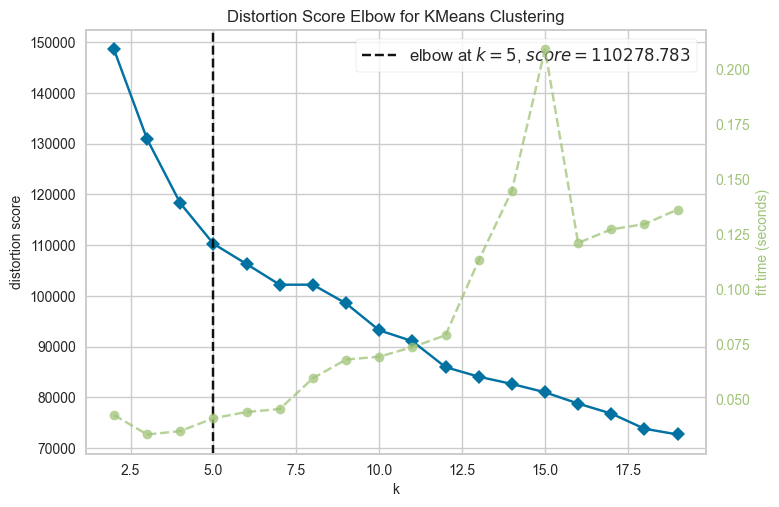

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [178]:
model = KMeans(random_state=155)
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(X_pca16)
visualizer1.show()

**Final Model for K-Means on PCA**

In [179]:
kmeans = KMeans(n_clusters = 5, random_state=155)
allDistances = kmeans.fit_transform(X_pca16)
km_labels = kmeans.fit_predict(X_pca16)

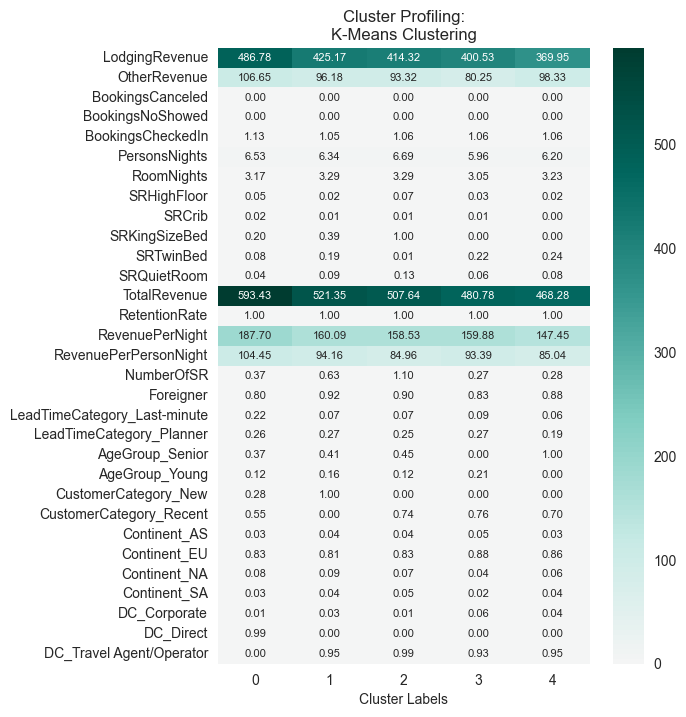

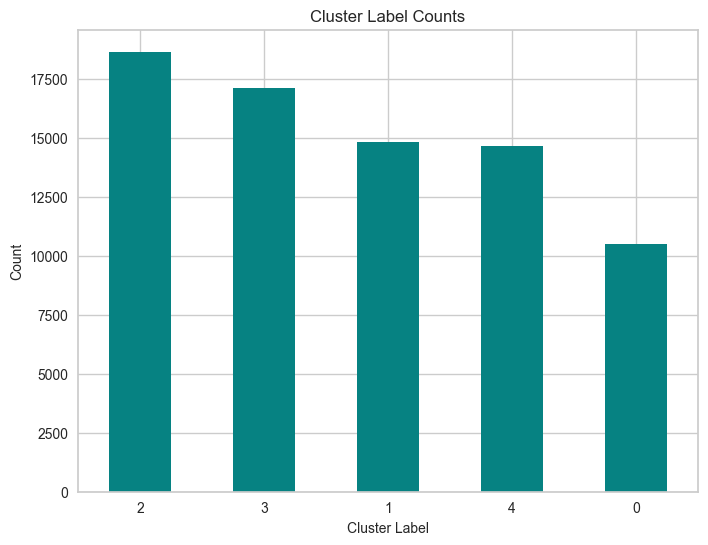

In [180]:
# Profiling and visualization
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

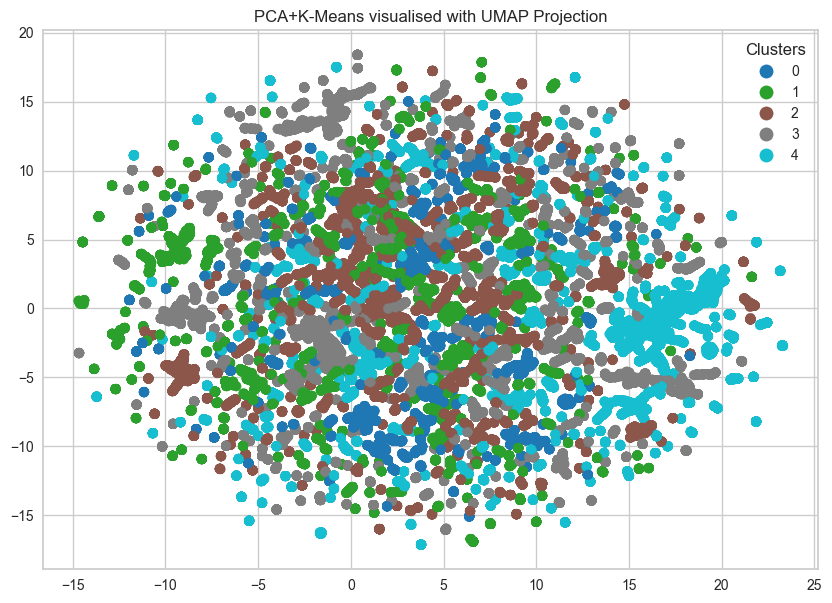

In [181]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets=km_labels, technique='PCA+K-Means visualised with UMAP')

## 3.3 DBSCAN

<a href="#top">Top &#129033;</a>

In [182]:
# K-distance graph to determine the optimal eps value
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(X_pca16)
distances, _ = neigh.kneighbors(X_pca16)
distances = np.sort(distances[:, -1])

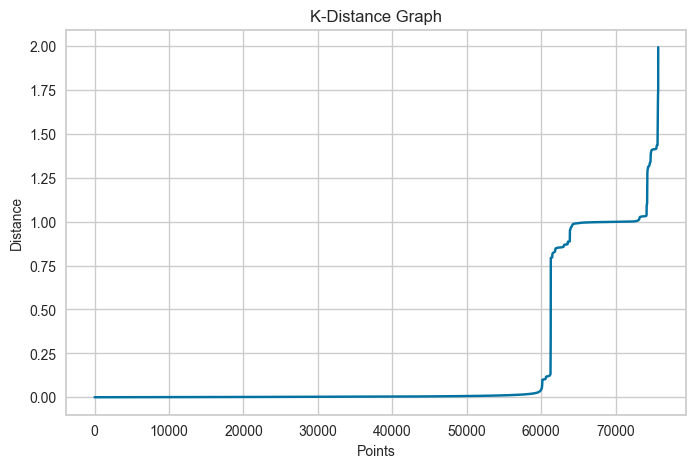

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
#plt.axhline(y=1.25, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN on PCA**

In [184]:
eps_value = 0.05
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_pca16)

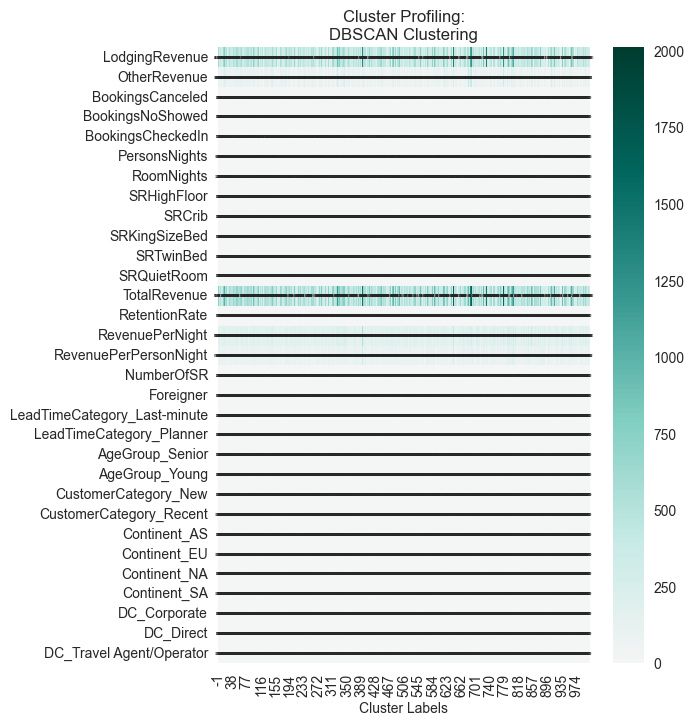

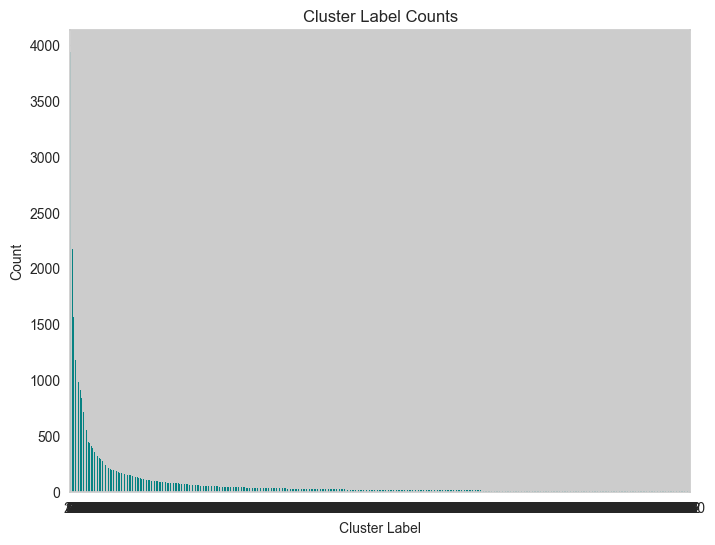

In [185]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN", annot_size = 2)
f.plot_counts(dbscan_labels)

# 4. Cluster Evaluation

<a href="#top">Top &#129033;</a>

### Quality of clustering

Before proceeding with further analysis, we need to validate that our clusters align with our expectations. This involves two key steps:  

1. **Visual Inspection:** we need to check whether the clusters make intuitive sense. Do examples that we consider similar fall into the same cluster? If not, we may need to reconsider our clustering approach or features, for instance.


2. **Quantitative Metrics:** we will evaluate our cluster quality using two metrics: 
- cluster cardinality: Cluster cardinality refers to the number of examples in each cluster. Very large or very small clusters might indicate issues, like one cluster capturing mostly noise.

- cluster magnitude: Measures the spread of a cluster, measured by the total distance of all points to the cluster center. Clusters with very high magnitude may contain more dispersed data points.

**Inter Cluster Distance**

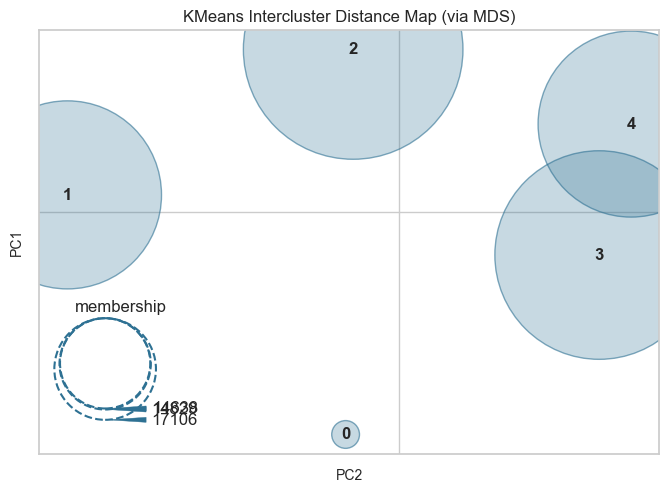

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [186]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca16)
visualizer.show()

**Silhouette**

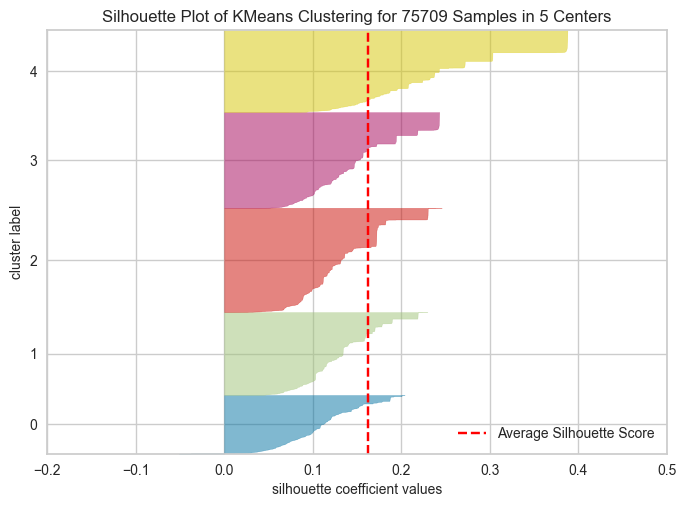

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 75709 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [187]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca16)
visualizer.show()

Cluster Cardinality

In [188]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

from matplotlib import ticker

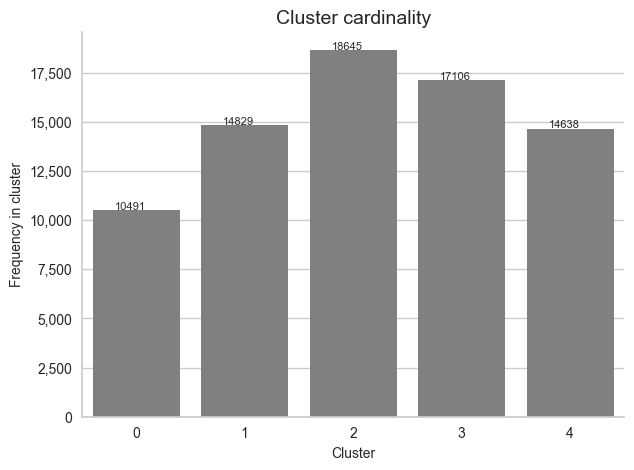

In [189]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = df.groupby(km_labels).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=km_labels, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cluster Magnitude

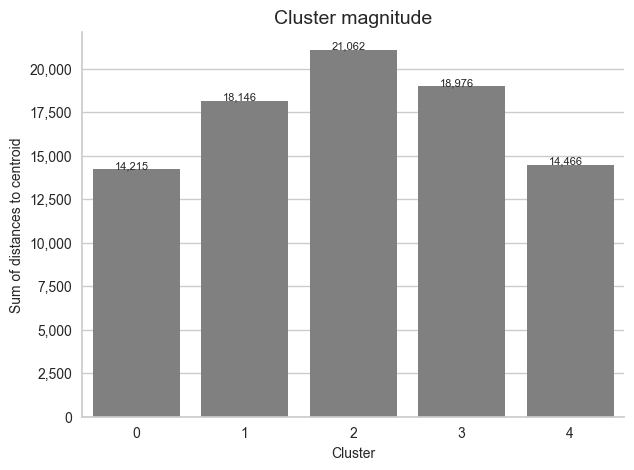

In [190]:
# Plot clusters magnitude

# Compute Magnitude
scaled_data['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = scaled_data['distanceToCentroid'].groupby(km_labels).sum()
scaled_data = scaled_data.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Magnitude versus cardinality

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. Using this graph, we can identify anomalous clusters by looking for ones that are not very close to the 45-degree line.

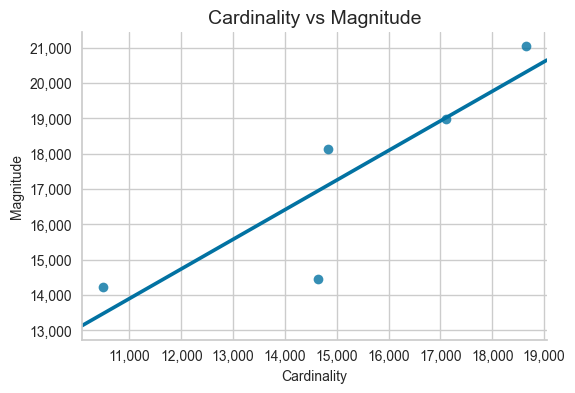

In [191]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)